# <a name="C1">Analyse des données</a>

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

transactions = pd.read_csv('ventes.csv')
produits = pd.read_csv('produits.csv')
clients = pd.read_csv('clients.csv')

--------
## Clients

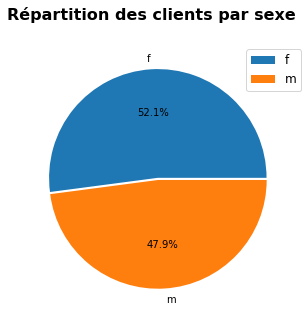

In [2]:
# Diagramme en secteurs -  Répartition des clients par sexe
clients["sex"].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=(0.01, 0.01),
    figsize=(7,5),
    label='')
plt.suptitle("Répartition des clients par sexe",fontsize=16,fontweight='bold')
plt.legend(loc="right", bbox_to_anchor=(1.05,0.90),fontsize=12)
plt.savefig("Clients par sexe.png")
plt.show()

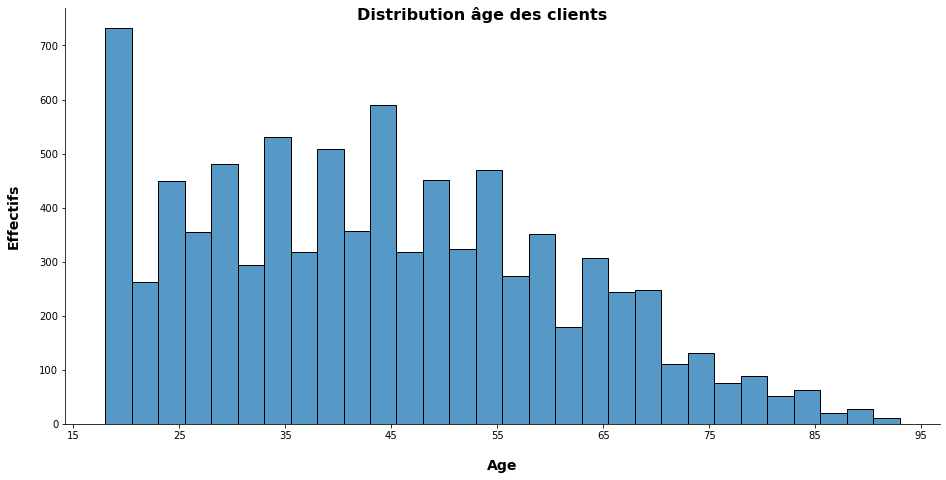

In [3]:
# Distribution des âges des clients
sns.displot(clients["age"],height=6.5, aspect=2,bins=30)
plt.xticks(np.arange(15,100,step=10))
plt.suptitle("Distribution âge des clients",fontsize=16,fontweight='bold')
plt.xlabel('Age',fontsize=14, fontweight='bold',labelpad=18)
plt.ylabel('Effectifs',fontsize=14, fontweight='bold',labelpad=18)
plt.savefig("Distribution age clients.png")
plt.show()

In [4]:
print("L'âge médian des clients est de",int(clients.age.median()),"ans.")
print("L'âge moyen des clients est de",int(clients.age.mean()),"ans.")

L'âge médian des clients est de 43 ans.
L'âge moyen des clients est de 43 ans.


--------
## Produits

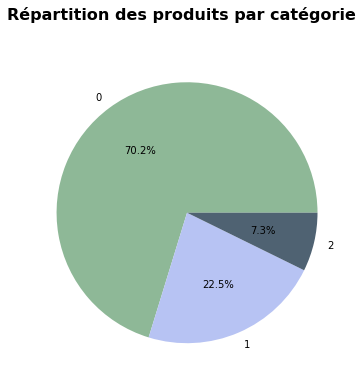

In [5]:
# Diagramme en secteurs - Répartition des produits par secteur
categ_colors = ['#8EB897','#B7C3F3','#4F6272']
produits["categ"].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    label='',
    colors=categ_colors)
plt.suptitle("Répartition des produits par catégorie",fontsize=16,fontweight='bold')
plt.savefig("Produits par catégorie.png")
plt.show()

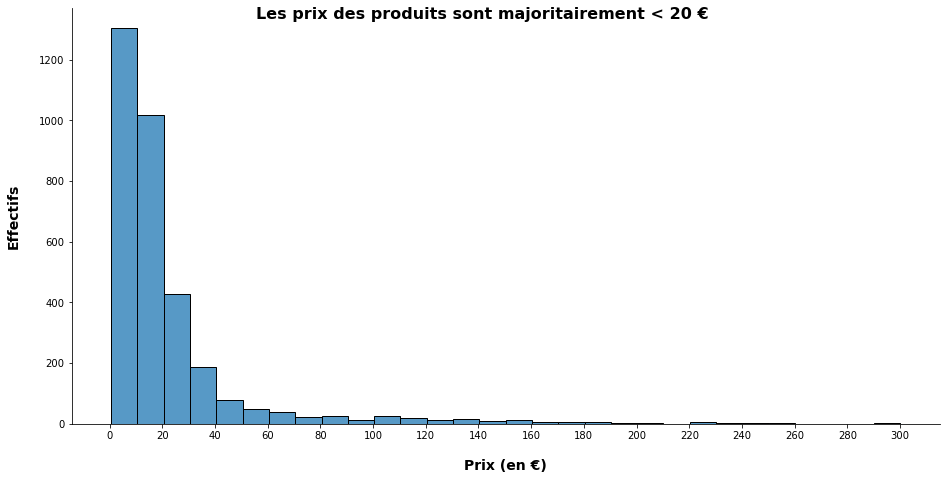

In [6]:
#Distribution des prix des produits
sns.displot(produits["price"], kde=False,height=6.5, aspect=2,bins=30)
plt.xticks(np.arange(0,320,step=20))
plt.suptitle("Les prix des produits sont majoritairement < 20 €",fontsize=16,fontweight='bold')
plt.ylabel('Effectifs',fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel('Prix (en €)',fontsize=14, fontweight='bold',labelpad=18)
plt.savefig("Distribution prix produits.png")
plt.show()

In [7]:
print("Le prix médian des produits est de",produits.price.median(),"€.")
print("Le prix moyen des produits est de",round(produits.price.mean(),2),"€.")

Le prix médian des produits est de 13.06 €.
Le prix moyen des produits est de 21.86 €.


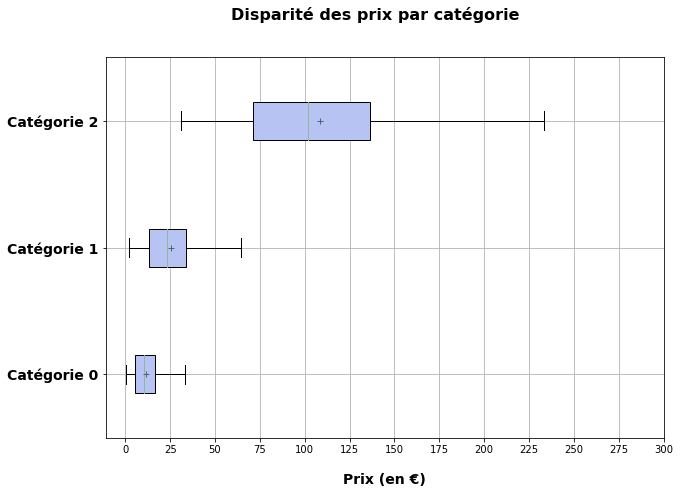

In [8]:
# Boîte à moustaches - Dispersion des prix par catégorie
plt.figure(figsize =(10, 7)) 
plt.boxplot([produits.price[produits.categ == 0],
             produits.price[produits.categ == 1],
             produits.price[produits.categ == 2]],
            vert = False, 
            showfliers=False,
            showmeans=True,  
            meanprops = {'marker':'+','markeredgecolor':'#4F6272',
            'markerfacecolor':'#4F6272'},
            medianprops = {'color':"#8EB897"},
            patch_artist=True,boxprops = dict(facecolor = '#B7C3F3'))
plt.suptitle("Disparité des prix par catégorie",fontsize=16,fontweight='bold')
plt.yticks([1, 2, 3], ['Catégorie 0', 'Catégorie 1', 'Catégorie 2'],
           fontsize=14,fontweight='bold')
plt.xticks(np.arange(0,325, step=25))
plt.xlabel('Prix (en €)',fontsize=14, fontweight='bold',labelpad=18)
plt.grid(True)
plt.savefig("Prix par catégorie.png",bbox_inches='tight')
plt.show()

Les prix des livres par catégorie sont très différents. Le prix des livres de la catégorie 2 sont beaucoup plus élevés que ceux des catégories 0 et 1.

--------
## Ventes

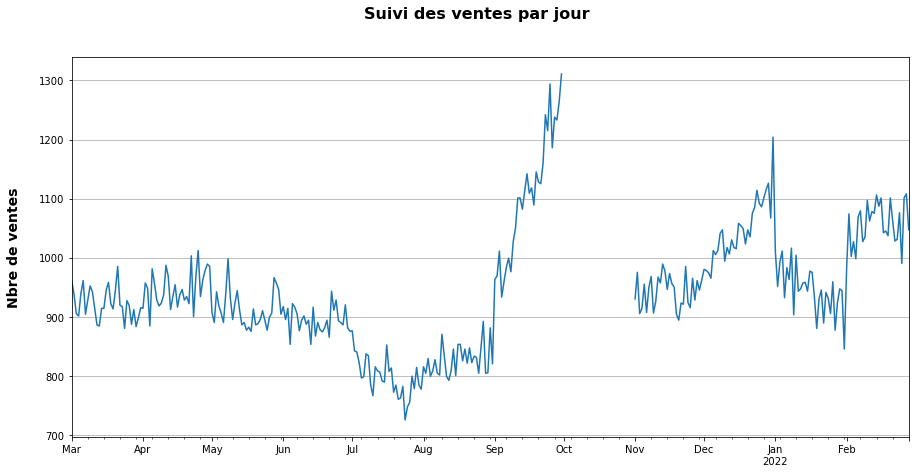

In [9]:
# Transformation du type de donnée de la variable date
transactions['date'] = pd.to_datetime(transactions['date'])
transactions['date_ssheure'] = pd.to_datetime(transactions.date.dt.date)

ventes_jour = transactions.date_ssheure.value_counts(sort=False)
idx = pd.date_range('2021-03-01', '2022-02-28')
ventes_jour.index = pd.DatetimeIndex(ventes_jour.index)
ventes_jour = ventes_jour.reindex(idx)

# Suivi des ventes par jour 
plt.suptitle("Suivi des ventes par jour",fontsize=16,fontweight='bold')
ventes_jour.plot(figsize =(15, 7))
plt.ylabel('Nbre de ventes',fontsize=14,fontweight='bold',labelpad=18)
#plt.xlabel('Jour',fontsize=14,fontweight='bold',labelpad=18)
plt.grid(axis = 'y')
plt.savefig("Suivi des ventes par jour.png")
plt.show()

Très forte augmentation du nombre de ventes en septembre (rentrée scolaire) et en décembre (noël). Il y a aussi une augmentation significative des ventes en février.

In [10]:
# Pivot pour obtenir par mois le nombre de transaction par catégorie de produits
produit_categ = transactions.pivot_table(
    index=["mois"],
    values = "id_prod", 
    columns = "categ",
    aggfunc = 'count')
produit_categ = produit_categ.rename(columns={0.0:'Catégorie 0', 1.0:'Catégorie 1', 2.0 :'Catégorie 2'})

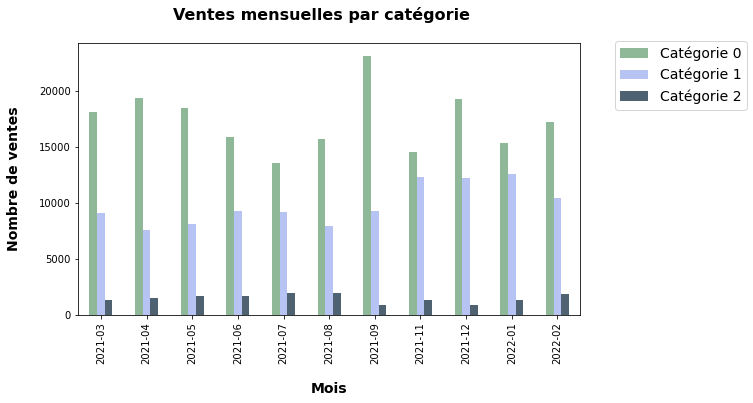

In [11]:
# Graphique avec le nombre de transactions par mois et par catégorie
produit_categ.plot(kind='bar',
                   figsize=(9,5),
                   color=categ_colors)
plt.legend(loc="lower center", bbox_to_anchor=(1.2,0.73),fontsize=14)
plt.suptitle("Ventes mensuelles par catégorie",fontsize=16,fontweight='bold')
plt.ylabel('Nombre de ventes',fontsize=14,fontweight='bold',labelpad=18)
plt.xlabel('Mois',fontsize=14,fontweight='bold',labelpad=18)
plt.savefig("Ventes mensuelles par catégorie.png",bbox_inches='tight')
plt.show()

Le nombre de produits vendus en catégorie 0 sur le mois de septembre est bien plus élevé que les autres mois mais le nombre de vente de produits de catégorie 2 a fortement diminué. 

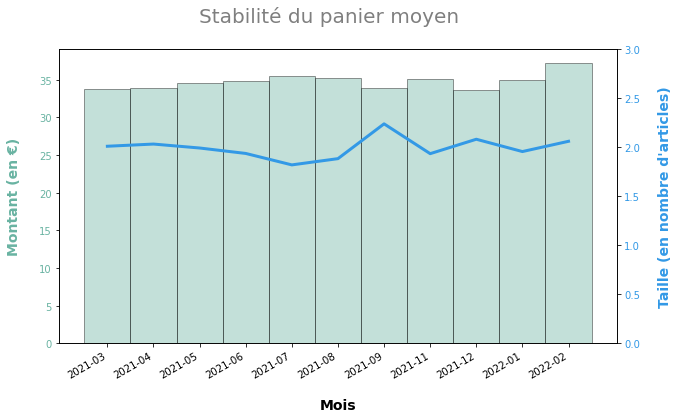

In [12]:
# Evolution du Panier moyen (en euros) par mois
panier_mois = pd.DataFrame(transactions.groupby('mois').price.sum())
panier_mois['nombre_session'] = transactions.groupby('mois').session_id.nunique()
panier_mois['panier_moyen'] = panier_mois.price/panier_mois.nombre_session
panier_mois.reset_index(inplace=True)

# Evolution du Panier moyen (en nombre d'articles) par mois
nbprod_panier = transactions.pivot_table(
    index=["mois","session_id"],
    values = "id_prod",
    aggfunc = 'count')
nbprod_panier = pd.DataFrame(nbprod_panier.groupby('mois').id_prod.mean())
nbprod_panier.reset_index(inplace=True)

# Graphique affichant les ventes et le CA par mois
color_montant = "#69b3a2"
color_nbprod = "#3399e6"

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.bar('mois','panier_moyen',data = panier_mois,color=color_montant,edgecolor="black", alpha=0.4, width=1.0)
ax2.plot(nbprod_panier.mois,nbprod_panier.id_prod,color=color_nbprod,lw=3)

ax1.set_xlabel('Mois',fontsize=14,fontweight='bold',labelpad=18)
ax1.set_ylabel('Montant (en €)', color=color_montant,fontsize=14,fontweight='bold',labelpad=18)
ax1.tick_params(axis='y', labelcolor=color_montant)

ax2.set_ylabel("Taille (en nombre d'articles)", color=color_nbprod,fontsize=14,fontweight='bold',labelpad=18)
ax2.tick_params(axis='y', labelcolor=color_nbprod)
ax2.set_yticks(np.arange(0,3.5,step=0.5))

fig.suptitle("Stabilité du panier moyen", fontsize=20, color = 'tab:grey')
fig.autofmt_xdate()
plt.savefig("Montant et taille du panier moyen.png")
plt.show()

La taille du panier est globalement autour de 2 articles avec une légère hausse en septembre. Le montant du panier moyen était en diminution en septembre et on constate une augmentation sur janvier et février 2022.

--------
## Chiffre d'affaires

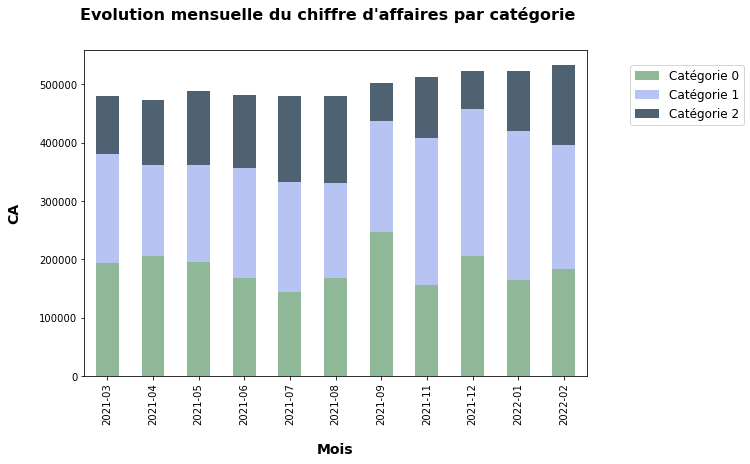

In [13]:
# Pivot CA par mois et par catégorie de produits
ca_categ = transactions.pivot_table(
    index=["mois"],
    values = "price", 
    columns = "categ",
    aggfunc = 'sum')
ca_categ = ca_categ.rename(columns={0.0:'Catégorie 0', 1.0:'Catégorie 1', 2.0 :'Catégorie 2'})

# Graphique CA mensuelle par catégorie
ca_categ.plot(kind='bar',
              stacked=True,
              figsize=(9, 6),
              color=categ_colors)
plt.legend(loc="lower center", bbox_to_anchor=(1.2,0.75), ncol=1,fontsize=12)
plt.suptitle("Evolution mensuelle du chiffre d'affaires par catégorie",fontsize=16,fontweight='bold')
plt.ylabel('CA',fontsize=14,fontweight='bold',labelpad=18)
plt.xlabel('Mois',fontsize=14,fontweight='bold',labelpad=18)
plt.savefig("CA par mois.png",bbox_inches='tight')
plt.show()


In [14]:
ca_categ['Total'] = round(ca_categ['Catégorie 0'] + ca_categ['Catégorie 1'] + ca_categ['Catégorie 2'],2)
ca_categ

categ,Catégorie 0,Catégorie 1,Catégorie 2,Total
mois,,,,
2021-03,193671.975152,186974.17,98771.48,479417.63
2021-04,205323.929125,156138.35,111682.70,473144.98
2021-05,196208.822357,165893.40,127359.59,489461.81
2021-06,167968.469562,189162.04,124209.56,481340.07
2021-07,144758.851179,188523.27,147663.47,480945.59
2021-08,167783.415152,162991.38,148635.99,479410.79
2021-09,246405.003536,190613.78,65893.29,502912.07
2021-11,155961.107946,252910.39,104136.00,513007.50
2021-12,206058.569562,251026.75,65934.49,523019.81


Le chiffre d'affaire du mois de septembre est supérieur au mois précédents mais ne semble pas aussi important que la hausse des ventes du mois de septembre vu sur le graphique précédent, la part du CA de la catégorie 0 est beaucoup plus importante sur ce mois.   
Le chiffre d'affaire total est en hausse, grâce à l'augmentation des CA des catégories 0 et 2 au mois de février.

In [15]:
# Sélection des 4 clients effectuant le plus d'achats
clients_top4 = transactions[transactions["client_id"].isin(
    ['c_1609','c_6714','c_3454','c_4958'])]
print("Les 4 clients effectuant le plus d'achats représentent",
      round(clients_top4.price.sum()*100/transactions.price.sum(),1),
      "% du CA.")

Les 4 clients effectuant le plus d'achats représentent 7.5 % du CA.


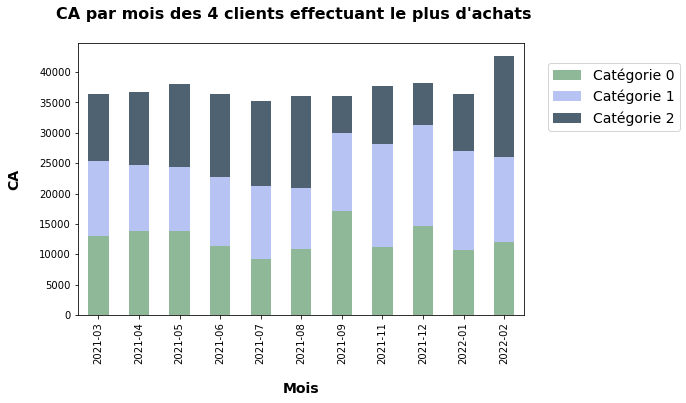

In [16]:
# CA par mois et par catégorie de produits des 4 clients les plus acheteurs
ca_categ_top4clients = clients_top4.pivot_table(
    index=["mois"],
    values = "price", 
    columns = "categ",
    aggfunc = 'sum')
ca_categ_top4clients = ca_categ_top4clients.rename(
    columns={0.0:'Catégorie 0', 1.0:'Catégorie 1', 2.0 :'Catégorie 2'})


# Graphique CA par mois et par catégorie de produits des 4 clients les plus acheteurs
ca_categ_top4clients.plot(kind='bar',
                          stacked=True,
                          figsize=(8, 5),
                          color = categ_colors)
plt.legend(loc="lower center", bbox_to_anchor=(1.20,0.65), ncol=1,fontsize=14)
plt.suptitle("CA par mois des 4 clients effectuant le plus d'achats",
             fontsize=16,fontweight='bold')
plt.ylabel('CA',fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel('Mois',fontsize=14, fontweight='bold',labelpad=18)
plt.savefig("CA par mois top4 clients.png",bbox_inches='tight')
plt.show()

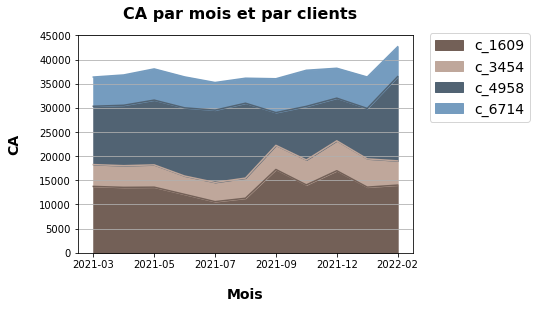

In [17]:
# CA par mois par client
colors_client = ["#736057","#BFA79B","#516373","#759CBF"]
ca_top4clients = clients_top4.pivot_table(
    index=["mois"],
    values = "price", 
    columns = "client_id",
    aggfunc = 'sum')
ca_top4clients
ca_top4clients.plot(kind = 'area',
                    stacked=True,
                    color = colors_client)
plt.legend(loc="lower center", bbox_to_anchor=(1.20,0.57), ncol=1,fontsize=14)
plt.suptitle("CA par mois et par clients",fontsize=16,fontweight='bold')
plt.yticks(np.arange(0.0,50000,step=5000))
plt.grid(axis = 'y')
plt.ylabel('CA',fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel('Mois',fontsize=14, fontweight='bold',labelpad=18)
plt.savefig("CA par mois et par clients top4.png",bbox_inches='tight')
plt.show()

In [18]:
# Jointure transactions et clients
transactions = pd.merge(transactions,clients,
                       on = 'client_id',
                       how = 'inner')

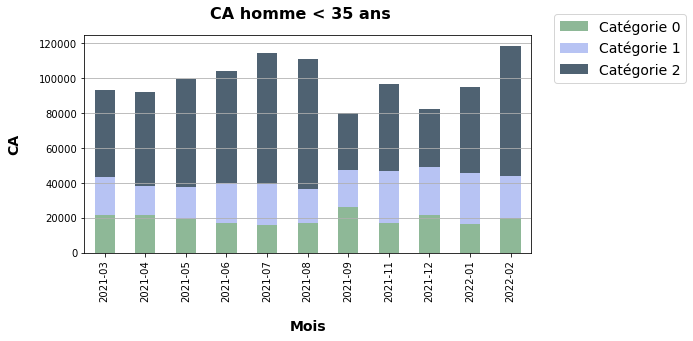

In [19]:
# Pivot pour obtenir le CA par mois et par catégorie de produits
jeune_ca = transactions[(transactions.sex=='m')&(transactions.age<=35)].pivot_table(
    index=["mois"],
    values = "price", 
    columns = "categ",
    aggfunc = 'sum')
jeune_ca = jeune_ca.rename(columns={0.0:'Catégorie 0', 1.0:'Catégorie 1', 2.0 :'Catégorie 2'})


jeune_ca.plot(kind='bar',
              stacked=True,
              figsize=(8, 4),
              color = categ_colors)
plt.legend(loc="lower center", bbox_to_anchor=(1.2,0.75), ncol=1,fontsize=14)
plt.suptitle("CA homme < 35 ans",fontsize=16,fontweight='bold')
plt.ylabel('CA',fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel('Mois',fontsize=14, fontweight='bold',labelpad=18)
plt.grid(axis='y')
plt.yticks(np.arange(0.0,130000,step=20000))
plt.savefig("CA mensuel Homme < 35 ans.png",bbox_inches='tight')
plt.show()

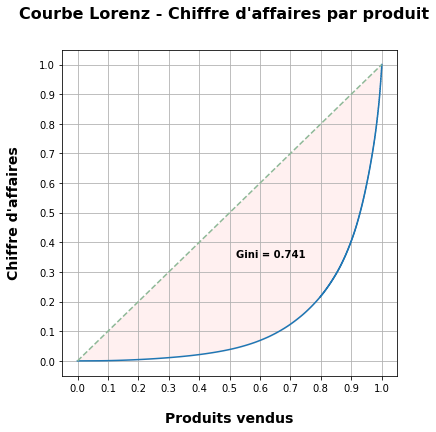

In [20]:
# Courbe de lorenz -  CA par livres
effectifs = transactions.groupby('id_prod').price.sum()

ca_livre = pd.DataFrame(effectifs.index, columns = ["id_prod"]) 
ca_livre["ca"] = effectifs.values


n = len(ca_livre)
lorenz = np.cumsum(np.sort(ca_livre["ca"])) / ca_livre["ca"].sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

# Calcul de gini
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S

plt.figure(figsize =(6, 6)) 
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1], 'k--', color='#8EB897')
plt.fill_between(xaxis, lorenz, xaxis, color='#fff0f0')
plt.text(0.52, 0.35, 'Gini = {:0.3f}'.format(gini),weight="bold")
plt.xticks(np.arange(0.0,1.1,step=0.1))
plt.yticks(np.arange(0.0,1.1,step=0.1))
plt.suptitle("Courbe Lorenz - Chiffre d'affaires par produit",fontsize=16,fontweight='bold')
plt.xlabel('Produits vendus',fontsize=14, fontweight='bold',labelpad=18)
plt.ylabel("Chiffre d'affaires",fontsize=14, fontweight='bold',labelpad=18)
plt.grid(True)
plt.savefig("CA par produits.png")
plt.show()

### Indice de Gini est d'environ 0.74, la situation est très inégalitaire se rapprochant de 1. On a une concentration du CA sur un nombre réduit de livres.
### 60% du CA est généré par les 10% des livres les plus vendus
### Environ 50% des produits génèrent moins de 5% du chiffre d'affaires

In [21]:
# Jointure entre ca_livre et produits
ca_livre = pd.merge(ca_livre,
                    produits,
                    how='inner')
ca_total = ca_livre.ca.sum()

livre_top5 = ca_livre.sort_values('ca',ascending = False).head(int(5*len(produits)/100))
livre_top10 = ca_livre.sort_values('ca',ascending = False).head(int(10*len(produits)/100))
print("Il existe",len(produits),
      'produits référencés au catalogue,', len(ca_livre),
      "produits ayant généré au moins une vente.")
print("Les",int(5*len(produits)/100),"références les plus vendus représentent",
      int(5*len(produits)/len(ca_livre)),
      "% du nombre de livres référencés et ",
      round(livre_top5.ca.sum()*100/ca_total),
      "% du CA.")
print("Les",int(10*len(produits)/100),"références les plus vendus représentent",
      int(10*len(produits)/len(ca_livre)),
      "% du nombre de livres référencés vendus et ",
      round(livre_top10.ca.sum()*100/ca_total),
      "% du CA.")

Il existe 3287 produits référencés au catalogue, 3263 produits ayant généré au moins une vente.
Les 164 références les plus vendus représentent 5 % du nombre de livres référencés et  41 % du CA.
Les 328 références les plus vendus représentent 10 % du nombre de livres référencés vendus et  60 % du CA.


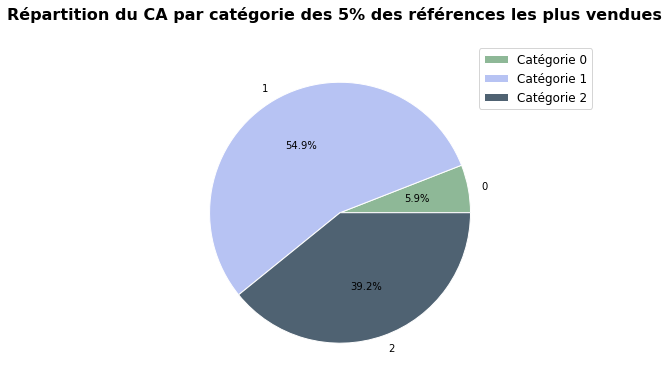

In [22]:
# Diagramme en secteurs - Répartition du CA des 5% produits les plus vendus par catégorie
livre_top5.groupby('categ').ca.sum().plot(
    y='ca',
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    label='',
    colors=categ_colors,
    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.legend(['Catégorie 0', 'Catégorie 1', 'Catégorie 2'],
           loc="lower center", 
           bbox_to_anchor=(1.1,0.80),
           fontsize=12)


plt.suptitle("Répartition du CA par catégorie des 5% des références les plus vendues",fontsize=16,fontweight='bold')
plt.savefig("Top5% CA par catégorie.png",bbox_inches='tight')
plt.show()

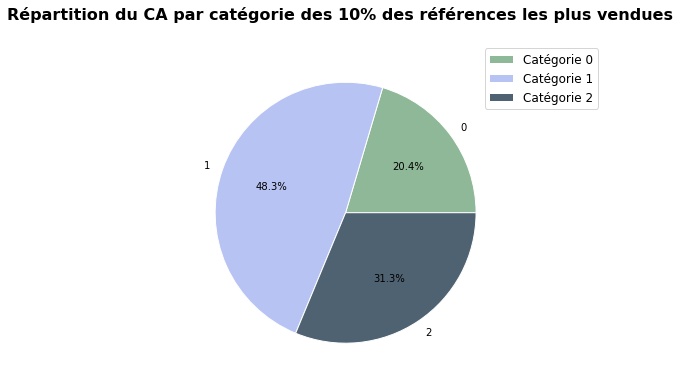

In [23]:
# Diagramme en secteurs - Répartition du CA des 10% produits les plus vendus par catégorie
livre_top10.groupby('categ').ca.sum().plot(
    y='ca',
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    label='',
    colors=categ_colors,
    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.legend(['Catégorie 0', 'Catégorie 1', 'Catégorie 2'],
           loc="lower center", 
           bbox_to_anchor=(1.1,0.80),
           fontsize=12)

plt.suptitle("Répartition du CA par catégorie des 10% des références les plus vendues",fontsize=16,fontweight='bold')
plt.savefig("Top10% CA par catégorie.png",bbox_inches='tight')
plt.show()

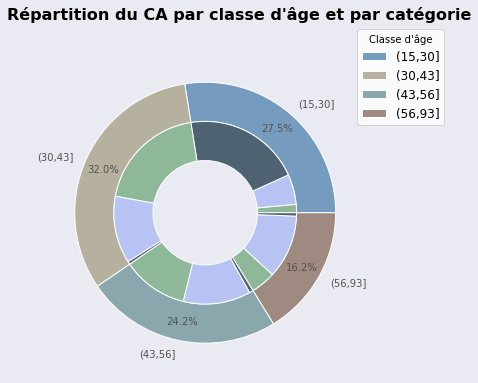

In [24]:
# Création dataframe CA par classe d'âge et par catégorie
ca_agecateg = transactions.pivot_table('price', ['classe_age', 'categ'],aggfunc='sum')

facecolor = '#eaeaf2'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
labels = ['(15,30]','(30,43]','(43,56]','(56,93]']
size = 0.3
vals = ca_agecateg['price']

# classe_age values = sum of categ values
group_sum = ca_agecateg.groupby('classe_age')['price'].sum()

fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)

#color
outer_colors = ['#759CBF','#b5b19e','#89a7ad', '#9f8a81']
inner_colors = ['#8EB897','#B7C3F3','#4F6272',
                '#8EB897','#B7C3F3','#4F6272',
                '#8EB897','#B7C3F3','#4F6272',
                '#8EB897','#B7C3F3','#4F6272']
# Outer pie CA par classe d'âge 
ax.pie(group_sum, 
       radius=1,
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=outer_colors, 
       labels=labels, 
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))
ax.legend(["15-30 ans", "31-43 ans","43-56 ans","56-93 ans"])

# Inner pie par catégorie
ax.pie(vals, 
       radius=1-size, # size=0.3
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

plt.legend(loc="lower center", 
           bbox_to_anchor=(1.1,0.75),
           fontsize=12,
           title = "Classe d'âge")
plt.suptitle("Répartition du CA par classe d'âge et par catégorie",
             fontsize=16,
             fontweight='bold',
             x=0.56)
plt.savefig("CA par classe d'age.png",bbox_inches='tight')
plt.show()

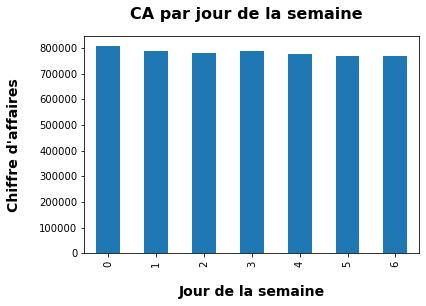

In [25]:
# CA par jour de la semaine
# Lundi = 0
transactions['Jour']= transactions.date_ssheure.dt.dayofweek
ca_jour = transactions.groupby('Jour').price.sum()
ca_jour.plot(kind= 'bar')
plt.suptitle("CA par jour de la semaine",
             fontsize=16,
             fontweight='bold')
plt.xlabel('Jour de la semaine',fontsize=14, fontweight='bold',labelpad=18)
plt.ylabel("Chiffre d'affaires",fontsize=14, fontweight='bold',labelpad=18)
plt.show()

--------
## 1/ Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

In [26]:
# Suppression des 4 clients "pro"
transac = transactions[~transactions["client_id"].isin(['c_1609','c_6714','c_3454','c_4958'])]

# Tableau de contingence
X = "categ"
Y = "sex"
cont = transac[[X,Y]].pivot_table(index=X, columns = Y, aggfunc=len, margins= True, margins_name="Total")

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(transac)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

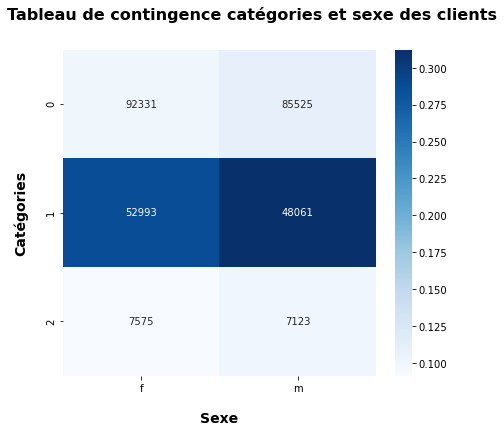

ξn = 8.965632630745457


In [27]:
plt.figure(figsize =(7, 6)) 
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],fmt='.0f', cmap='Blues')
plt.suptitle("Tableau de contingence catégories et sexe des clients",fontsize=16,fontweight='bold')
plt.ylabel("Catégories",fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel ('Sexe', fontsize=14,fontweight='bold',labelpad=18)
plt.savefig("Tableau de contingence catégorie et sexe.png")
plt.show()
print("ξn =",xi_n)

In [28]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square(column_1, column_2):
  """
  This function help to identify if our variable are independent or dependent
  """
  data_crosstab = pd.crosstab(column_1,column_2, margins = False)

  stat, p, dof, expected = chi2_contingency(data_crosstab)

    #We put our degree of significance at 95%
  prob = 0.95
  critical = chi2.ppf(prob, dof)
  if abs(stat) >= critical:
    print('Test chi-2 = Rejet hypothèse nulle (parfaite indépendance), nos variables sont dépendantes')
  else:
    print("""Test chi-2 = Echec du rejet hypothèse nulle (parfaite indépendance), nos variables sont indépendantes""")

chi_square(column_1=transac['categ'], column_2=transac['sex'])


Test chi-2 = Rejet hypothèse nulle (parfaite indépendance), nos variables sont dépendantes


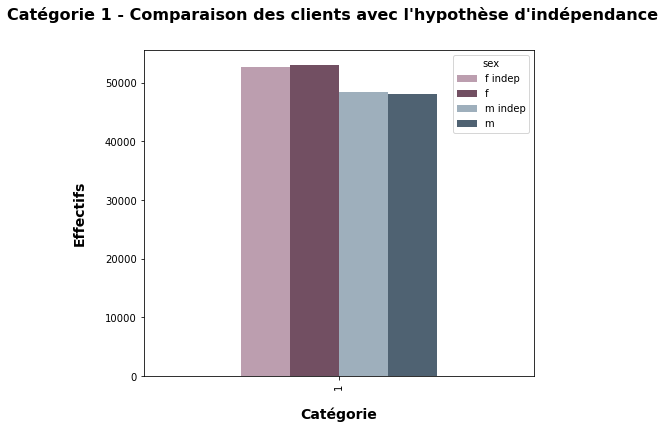

In [29]:
# Comparaison graphique avec les valeurs d'indépendance pour la catégorie 1

independance = pd.DataFrame(indep.loc[[1],['f','m']])
independance = independance.rename(columns={'f':'f indep', 'm':'m indep'})

categ_sex = pd.DataFrame(cont.loc[[1],['f','m']])
categ_sex = pd.merge(categ_sex,
                     independance,
                     on = 'categ',
                     how='inner')

colors = ['#bc9eaf','#724f62','#9eafbc','#4F6272']
categ_sex = categ_sex[['f indep','f','m indep','m']]
categ_sex.plot(kind='bar', figsize=(7,6), color = colors)
plt.suptitle("Catégorie 1 - Comparaison des clients avec l'hypothèse d'indépendance",fontsize=16,fontweight='bold')
plt.ylabel("Effectifs",fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel ('Catégorie', fontsize=14,fontweight='bold',labelpad=18)
plt.savefig("Catégorie 1 - comparaison avec l'hypothèse d'indépendance.png")
plt.show()

Il y a une relation entre le sexe et la catégorie 1, les hommes achètent moins et les femmes achètent plus dans cette catégorie comparativement à l'hypothèse d'indépendance.
Il y a une indépendance en fonction du sexe pour les catégories 0 et 2. 

--------
## 2/ Y a-t-il une corrélation entre l'âge des clients et le montant total des achats ?

In [30]:
# Calcul du montant total d'achats par client
clients_ca = transac.groupby(['client_id', 'age','classe_age'])["price"].agg(['sum'])
clients_ca.reset_index(inplace=True)
clients_ca = clients_ca.rename(columns={'sum':'achats'})

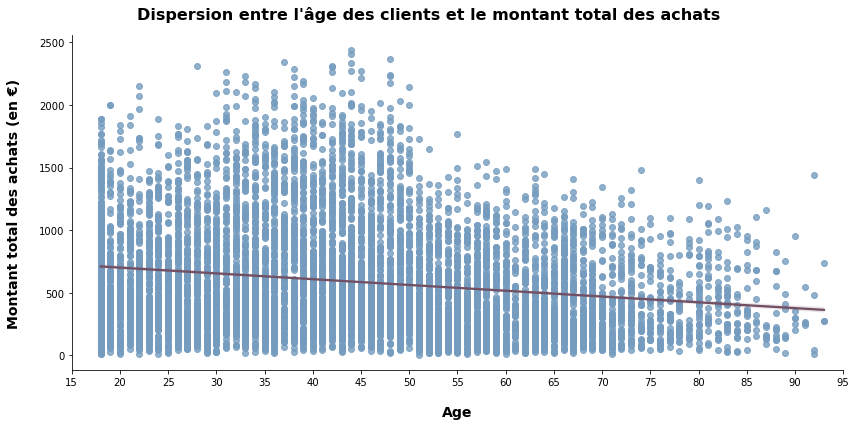

In [31]:
graph = sns.lmplot(x='age', 
                   y="achats", 
                   data=clients_ca, 
                   line_kws={'color' : '#724f62'}, 
                   height = 6,
                   aspect=2,
                   scatter_kws={"color": "#759CBF"})
graph.ax.set_xticks(np.arange(15, 100,5))
plt.suptitle("Dispersion entre l'âge des clients et le montant total des achats",fontsize=16,fontweight='bold')
plt.ylabel("Montant total des achats (en €)",fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel ('Age', fontsize=14,fontweight='bold',labelpad=18)
plt.tight_layout()
plt.savefig("Dispersion âge des clients et montant total des achats.png")
plt.show()

Les personnes entre 17 et 50 ans ont un montant total d'achats plus dispersés, allant jusqu'à 2500€.

In [32]:
cov = np.cov(clients_ca["age"],clients_ca["achats"],ddof=0)[1,0]
print("cov = ",cov)
r = st.pearsonr(clients_ca["age"],clients_ca["achats"])[0]
print('r =',r)
print('r\u00b2 =',r*r)

cov =  -1323.2099916648024
r = -0.18102019458888827
r² = 0.03276831084899897


Nuage dispersé  
L'âge a-t-il une influence sur le montant total des achats ?  
Covariance négative = les variables âge et montant total des achats évoluent en sens opposée. Plus l'âge est important, moins le montant total des achats est important.  
Covariance élevée = c'est difficile à interpréter car les variables sont dans des unités de mesures différentes (X en année, Y en euros, c'est le produit de la dimension des variables). Evaluons le coefficient de corrélation de pearson.  
r (pearson) proche de 0, les deux variables sont indépendantes. r<0 les variables âge et montant total des achats évoluent en sens opposé.  
r² --> seulement 3% des variations du montant total des achats s'expliquerait par l'âge.

In [33]:
# Vérification s'il existe une dépendance en fonction des classes d'âge avec les test de chi-2
chi_square(column_1=clients_ca['classe_age'], column_2=clients_ca['achats'])

Test chi-2 = Echec du rejet hypothèse nulle (parfaite indépendance), nos variables sont indépendantes


--------
## Y a-t-il une corrélation entre l'âge des clients et la fréquence d’achat (ie. nombre d'achats par mois par exemple) ?

In [34]:
# Pivot pour obtenir par mois le nombre de transactions par âge
freqachat_mois = transac.pivot_table(
    index=["client_id","age","classe_age","mois"],
    values = "num_session",
    aggfunc = 'count')
freqachat_mois.reset_index(inplace=True)
freqachat_mois = freqachat_mois.rename(columns={'num_session':'nbr_achats'})
freqachat_client = pd.DataFrame(freqachat_mois.groupby(["client_id","age","classe_age"]).nbr_achats.sum())
freqachat_client['freq_mois'] = round(freqachat_client.nbr_achats/11,1)
freqachat_client.reset_index(inplace=True)

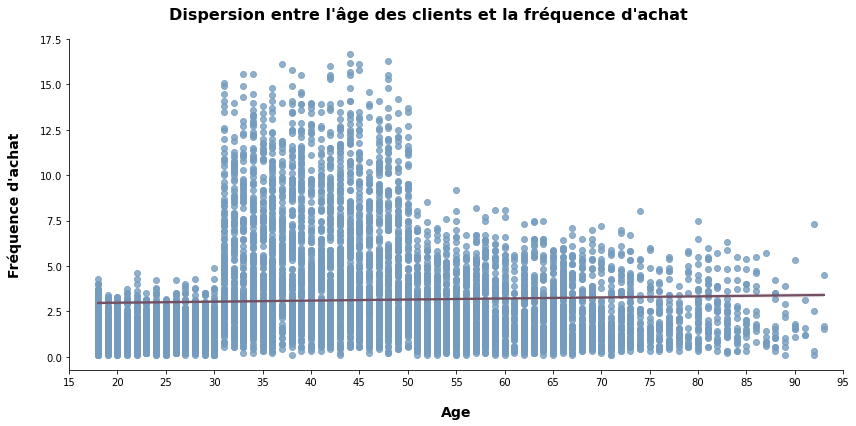

In [35]:
graph1 = sns.lmplot(x='age', 
                    y="freq_mois", 
                    data=freqachat_client, 
                    line_kws={'color' : '#724f62'}, 
                    height = 6,
                    aspect=2,
                    scatter_kws={"color": "#759CBF"})
graph1.ax.set_xticks(np.arange(15, 100,5))
plt.suptitle("Dispersion entre l'âge des clients et la fréquence d'achat",fontsize=16,fontweight='bold')
plt.ylabel("Fréquence d'achat",fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel ('Age', fontsize=14,fontweight='bold',labelpad=18)
plt.tight_layout()
plt.savefig("Dispersion âge des clients et fréquence d'achat.png")
plt.show()

In [36]:
cov = np.cov(freqachat_client["age"],freqachat_client["freq_mois"],ddof=0)[1,0]
print("cov =",cov)
r = st.pearsonr(freqachat_client["age"],freqachat_client["freq_mois"])[0]
print('r =',r)
print('r\u00b2 =',r*r)

cov = 1.6780532529175776
r = 0.03499111074540003
r² = 0.0012243778311968496


Nuage dispersé, graphique faisant apparaître que les plus jeunes (entre 15 et 30 ans) font des achats moins fréquents. Entre 30 et 50 ans la fréquence d'achat est plus étendu.   
L'âge a-t-il une influence sur la fréquence des achats ?  
Covariance positive = les variables âge et montant total des achats évoluent dans le même sens. Plus l'âge est important, plus la fréquence d'achats est importante.  
Covariance proche de 0, cela signifie qu'il n'y a pas de corrélation. Evaluons le coefficient de corrélation de pearson.  
r (pearson) proche de 0, les deux variables sont indépendantes. 

In [37]:
# Vérification s'il existe une dépendance en fonction des classes d'âge avec les test de chi-2
chi_square(column_1=freqachat_client['classe_age'], column_2=freqachat_client['freq_mois'])

Test chi-2 = Rejet hypothèse nulle (parfaite indépendance), nos variables sont dépendantes


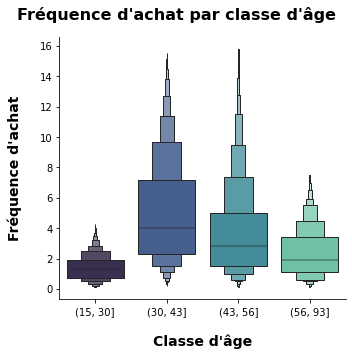

In [38]:
graph2 = sns.catplot(x= 'classe_age', 
                     y='freq_mois',
                     data = freqachat_client.sort_values("classe_age", ascending = True),
                     kind="boxen", 
                     showfliers=False, 
                     palette="mako")
plt.suptitle("Fréquence d'achat par classe d'âge",fontsize=16,fontweight='bold')
plt.ylabel("Fréquence d'achat",fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel ("Classe d'âge", fontsize=14,fontweight='bold',labelpad=18)
plt.tight_layout()
plt.savefig("Classe d'âge des clients et fréquence d'achat.png")

Les 30 à 43 ans ont les fréquences d'achats les plus importantes (majoritairement entre 2 et 8 achats par mois) , puis les 43 à 56 ans, puis 56 à 93 ans. Quand aux 15-30 ans ils effectuent majoritairement moins de 2 achats par mois.

--------
## Y a-t-il une corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles) ?

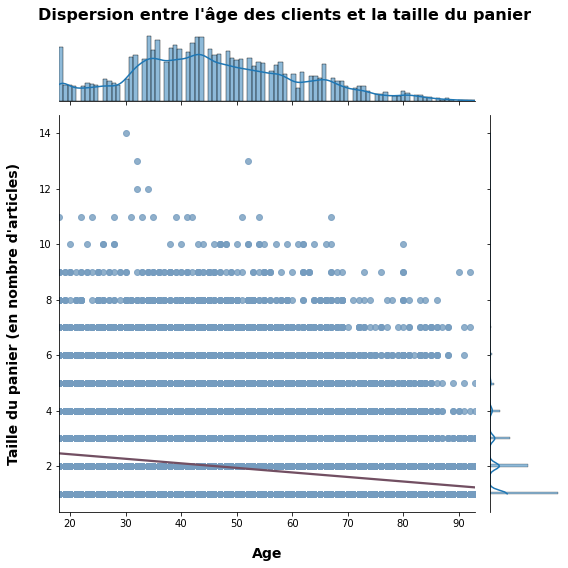

In [39]:
nbtransac_session = transac.pivot_table(
    index=["client_id","age","classe_age","num_session","sex"],
    values = "id_prod",
    aggfunc = 'count')
nbtransac_session.reset_index(inplace=True)

sns.jointplot(x='age', 
              y="id_prod", 
              data=nbtransac_session, 
              kind='reg',
              line_kws={'color' : '#724f62'},
              scatter_kws={"color": "#759CBF"},
              height = 8)
plt.suptitle("Dispersion entre l'âge des clients et la taille du panier",fontsize=16,fontweight='bold')
plt.ylabel("Taille du panier (en nombre d'articles)",fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel ("Age", fontsize=14,fontweight='bold',labelpad=18)
plt.tight_layout()
plt.savefig("Dispersion entre l'âge des clients et la taille du panier.png")
plt.show()

In [40]:
cov = np.cov(nbtransac_session["age"],nbtransac_session["id_prod"],ddof=0)[1,0]
print("cov =",cov)
r = st.pearsonr(nbtransac_session["age"],nbtransac_session["id_prod"])[0]
print('r =',r)
print('r\u00b2 =',r*r)

cov = -3.78709837040763
r = -0.19458082838863763
r² = 0.03786169877640845


Nuage dispersé  
L'âge a-til une influence sur la taille du panier moyen ?  
Covariance négative = les variables âge et la taille du panier évoluent en sens opposée. Plus l'âge est important, moins la taille du panier est importante.  
  
r (pearson) proche de 0, les deux variables sont indépendantes. r<0 les variables âge et montant total des achats évoluent en sens opposé.  
r² --> 3% des variations du montant total des achats s'expliquent par l'âge.

In [41]:
# Vérification s'il existe une dépendance en fonction des classes d'âge avec les test de chi-2
chi_square(column_1=nbtransac_session['classe_age'], column_2=nbtransac_session['id_prod'])

Test chi-2 = Rejet hypothèse nulle (parfaite indépendance), nos variables sont dépendantes


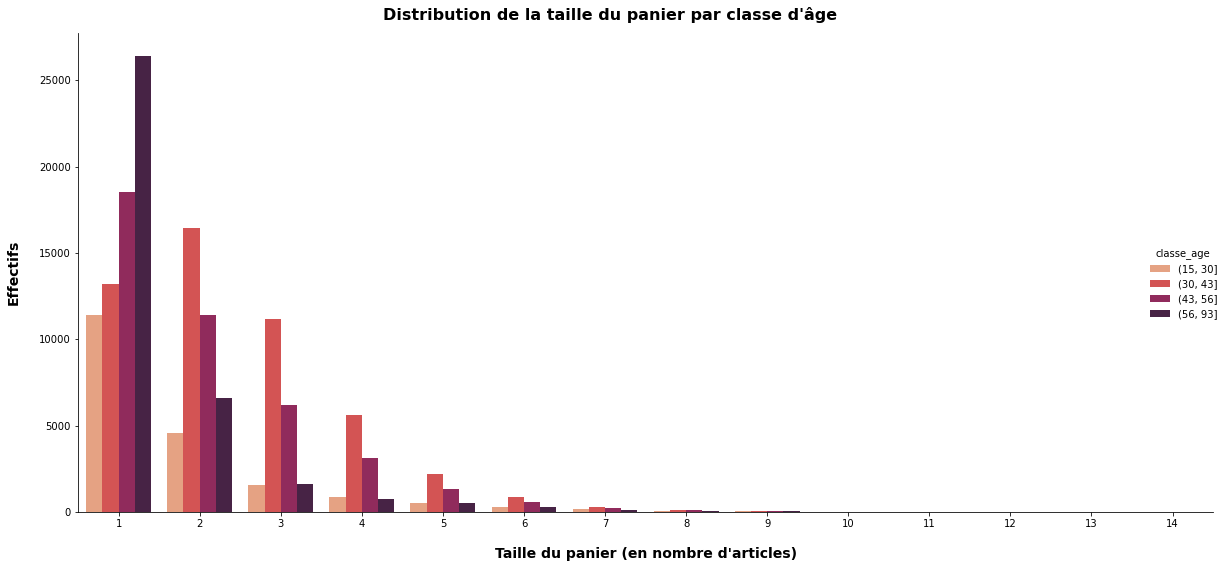

In [42]:
# Distribution graphique de la taille du panier par classe d'âge
graph2 = sns.catplot(x= 'id_prod', 
                     kind= 'count',
                     data = nbtransac_session.sort_values("classe_age", ascending = True),
                     hue="classe_age", 
                     height = 8,
                     aspect = 2,
                     palette = 'rocket_r')
plt.suptitle("Distribution de la taille du panier par classe d'âge",fontsize=16,fontweight='bold')
plt.ylabel("Effectifs",fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel ("Taille du panier (en nombre d'articles)", fontsize=14,fontweight='bold',labelpad=18)
plt.tight_layout()
plt.savefig("Distribution de la taille du panier par classe d'âge.png")

Les clients de 30 à 43 ans achètent plus fréquemment 2 ouvrages par panier alors que les autres tranches d'âges achètent majoritairement 1 seul ouvrage par panier.

--------
## Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés ?

In [43]:
from scipy import stats
from scipy.stats import f_oneway

grouped_test=transac[['categ', 'age']].groupby(['categ'])
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test.get_group(0)['age'], grouped_test.get_group(1)['age'], grouped_test.get_group(2)['age'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 18586.804735119655 , P = 0.0


p value = 0, il y a une relation entre l'âge des clients et les catégories d'achats

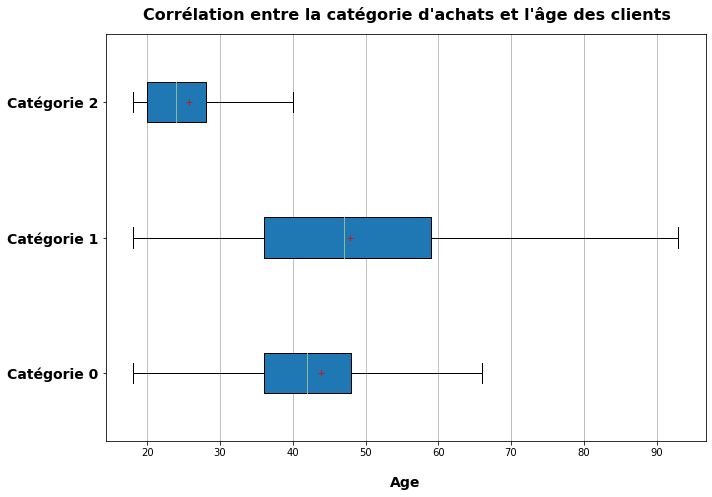

Catégorie 0
  Moyenne = 43
  Médiane= 42


Catégorie 1
  Moyenne = 47
  Médiane= 47


Catégorie 2
  Moyenne = 25
  Médiane= 24




In [44]:
plt.figure(figsize =(10, 7)) 
plt.boxplot([transac.age[transactions.categ == 0],
             transac.age[transactions.categ == 1],
             transac.age[transactions.categ == 2]], 
            vert = False,
            showfliers=False,
            showmeans=True,  
            meanprops = {'marker':'+','markeredgecolor':'firebrick',
            'markerfacecolor':'firebrick'},
            medianprops = {'color':"#8EB897"},
            patch_artist=True)
plt.yticks([1, 2, 3], ['Catégorie 0', 'Catégorie 1', 'Catégorie 2'],fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.grid(axis='x')
plt.suptitle("Corrélation entre la catégorie d'achats et l'âge des clients",fontsize=16,fontweight='bold',x=0.57)
plt.xlabel ("Age", fontsize=14,fontweight='bold',labelpad=18)
plt.tight_layout()
plt.savefig("Corrélation entre la catégorie d'achats et l'âge des clients.png")
plt.show()
for i in range(0,3) :
    print("Catégorie", i)
    print("  Moyenne =",int(transac.age[transactions.categ == i].mean()))
    print("  Médiane=",int(transac.age[transactions.categ == i].median()))
    print("\n")

Il y a une relation entre l'âge et les catégories d'achats. Les références de catégorie 2 sont majoritairement achetés par une population jeune. Les références de catégorie 1 sont achetés par l'ensemble de la population avec un âge médian de 47 ans. Les références de catégorie 0 sont achetés par les moins de 68 ans. 
Catégorie 2 --> 75% des clients ont moins de 28 ans      
Catégorie 1 --> 75% des clients ont moins de 58 ans         
Catégorie 0 --> 75% des clients ont moins de 49 ans  
Etendue d'âge des clients très importantes pour la catégorie 1

In [45]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(transac.age,transac.categ)

0.2628332501185539

In [46]:
# Vérification s'il existe une dépendance en fonction des classes d'âge avec les test de chi-2
chi_square(column_1=transac['classe_age'], column_2=transac['categ'])

Test chi-2 = Rejet hypothèse nulle (parfaite indépendance), nos variables sont dépendantes


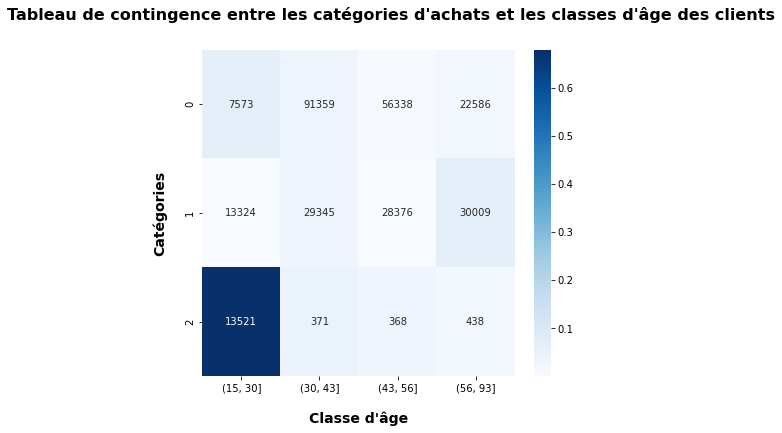

ξn = 119124.65705401843


In [47]:
# Tableau de contingence
X = "categ"
Y = "classe_age"
cont = transac[[X,Y]].pivot_table(index=X, columns = Y, aggfunc=len, margins= True, margins_name="Total")

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(transac)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

plt.figure(figsize =(7, 6)) 
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1],fmt='.0f', cmap='Blues')
plt.suptitle("Tableau de contingence entre les catégories d'achats et les classes d'âge des clients",fontsize=16,fontweight='bold')
plt.ylabel("Catégories",fontsize=14, fontweight='bold',labelpad=18)
plt.xlabel ("Classe d'âge", fontsize=14,fontweight='bold',labelpad=18)
plt.savefig("Tableau de contingence entre les catégories d'achats et les classes d'âge.png")
plt.show()
print("ξn =",xi_n)

Il y a un lien très significatif entre les jeunes de 15 à 30 ans et la catégorie 2.